# 🚕 Uber Ride Analytics Dashboard
An interactive dashboard built with Voila and ipywidgets.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv("ncr_ride_bookings.csv")

# Helper to add "All" option
def dropdown_options(col):
    opts = df[col].dropna().unique().tolist()
    return ['All'] + sorted(opts)

# Dropdowns for filters
vehicle_dropdown = widgets.Dropdown(
    options=dropdown_options('Vehicle Type'),
    description='Vehicle Type:',
    style={'description_width': 'initial'}
)

payment_dropdown = widgets.Dropdown(
    options=dropdown_options('Payment Method'),
    description='Payment Method:',
    style={'description_width': 'initial'}
)

status_dropdown = widgets.Dropdown(
    options=dropdown_options('Booking Status'),
    description='Booking Status:',
    style={'description_width': 'initial'}
)

def update_dashboard(vehicle, payment, status):
    clear_output(wait=True)
    # display(vehicle_dropdown, payment_dropdown, status_dropdown)
    
    # Filtering logic
    filtered = df.copy()
    if vehicle != 'All':
        filtered = filtered[filtered['Vehicle Type'] == vehicle]
    if payment != 'All':
        filtered = filtered[filtered['Payment Method'] == payment]
    if status != 'All':
        filtered = filtered[filtered['Booking Status'] == status]
    
    if filtered.empty:
        print("⚠️ No data available for the selected filters.")
        return
    
    # Create Tabs 
    tab_contents = [
        'Booking Value', 
        'Ride Distance', 
        'Avg CTAT', 
        'Cancellations',
        'Incomplete Rides Reason'   
    ]
    children = [widgets.Output() for _ in range(len(tab_contents))]
    tab = widgets.Tab(children=children)
    for i in range(len(tab_contents)):
        tab.set_title(i, tab_contents[i])

    # --- TAB 1: Booking Value Boxplot ---
    with children[0]:
        fig1, ax1 = plt.subplots(figsize=(8, 5))
        sns.boxplot(x='Vehicle Type', y='Booking Value', data=filtered, ax=ax1)
        ax1.set_title('Booking Value Distribution')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
        display(fig1)
        plt.close(fig1)

    # --- TAB 2: Ride Distance Histogram ---
    with children[1]:
        fig2, ax2 = plt.subplots(figsize=(8, 5))
        sns.histplot(filtered['Ride Distance'].dropna(), bins=30, kde=True, ax=ax2)
        ax2.set_title('Ride Distance Distribution')
        display(fig2)
        plt.close(fig2)

    # --- TAB 3: Avg CTAT Violin Plot ---
    with children[2]:
        fig3, ax3 = plt.subplots(figsize=(8, 5))
        sns.violinplot(x='Vehicle Type', y='Avg CTAT', data=filtered, ax=ax3)
        ax3.set_title('Avg CTAT by Vehicle Type')
        display(fig3)
        plt.close(fig3)

    # --- TAB 4: Cancelled Rides by Customer (Count) ---
    with children[3]:
        fig4, ax4 = plt.subplots(figsize=(8, 5))
        if (
            'Cancelled Rides by Customer' in filtered.columns and
            filtered['Cancelled Rides by Customer'].notna().sum() > 0
        ):
            sns.countplot(x='Cancelled Rides by Customer', data=filtered, ax=ax4)
            ax4.set_title('Cancelled Rides by Customer')
        else:
            ax4.text(0.5, 0.5, 'No data to display', ha='center', va='center')
            ax4.set_title('Cancelled Rides by Customer')
        display(fig4)
        plt.close(fig4)

    # --- TAB 5: Incomplete Ride Reasons ---
    with children[4]:
        fig5, ax5 = plt.subplots(figsize=(8, 5))
        if (
            'Incomplete Rides Reason' in filtered.columns and
            filtered['Incomplete Rides Reason'].notna().sum() > 0
        ):
            # Count occurrences
            reason_counts = filtered['Incomplete Rides Reason'].value_counts()
            # Pie plot
            ax5.pie(
                reason_counts,
                labels=reason_counts.index,
                autopct='%1.1f%%',
                startangle=140
            )
            ax5.set_title('Incomplete Rides Reasons')
            ax5.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
        else:
            ax5.text(0.5, 0.5, 'No data to display', ha='center', va='center')
            ax5.set_title('Incomplete Rides Reasons')
        display(fig5)
        plt.close(fig5)

    display(tab)

# Bind function to widgets
widgets.interact(
    update_dashboard,
    vehicle=vehicle_dropdown,
    payment=payment_dropdown,
    status=status_dropdown
)

# 🚕 Uber Ride Analytics Dashboard
An interactive dashboard built with Voila and ipywidgets.

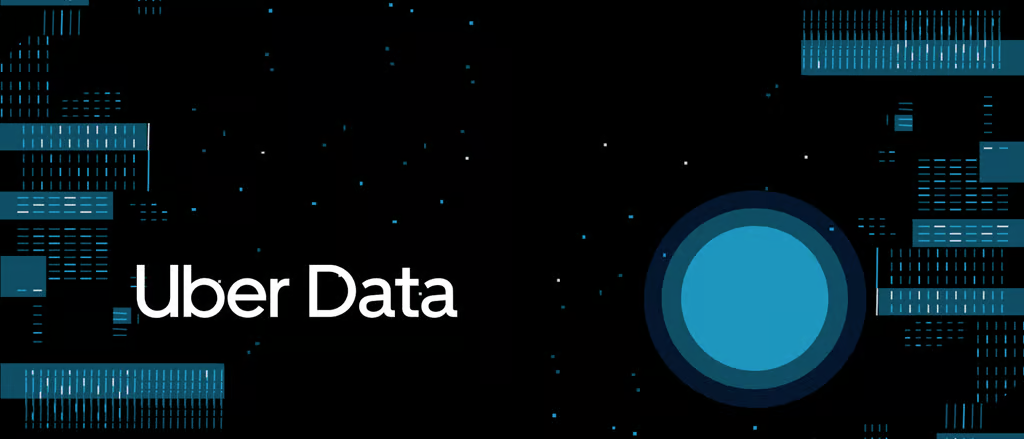

# 🚕 Exploratory Data Analysis on Uber Ride Analytics Dataset

This notebook presents an end-to-end Exploratory Data Analysis (EDA) of the **Uber Ride Analytics Dashboard dataset** from Kaggle. The objective is to uncover insights about ride patterns, customer behavior, booking trends, and operational bottlenecks through structured data exploration and visualization.

> **Dataset Source:** [Kaggle – Uber Ride Analytics Dashboard](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard)

---

## 📌 Objectives

- Understand the structure and content of the dataset.
- Handle missing values and outliers logically.
- Explore univariate and bivariate distributions.
- Visualize relationships between features.
- Derive actionable business insights from booking patterns and ride metrics.

---


In [ ]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Ensuring non-GUI backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline

# For missing data visualization
import missingno as msno

# Set visualization style
sns.set(style='whitegrid', palette='muted', color_codes=True)
sns.set_context("notebook") # readable sizing

# Set a custom color palette to use across plots
main_palette = sns.color_palette("Set2")
sns.set_palette(main_palette)

# Set matplotlib default figure size globally
plt.rcParams['figure.figsize'] = (10, 6)
# For reproducibility
np.random.seed(42)

# 🗂️ 1. Dataset Overview

We begin by loading the dataset and examining its structure, dimensions, and a general snapshot of the data to get familiar with the variables involved.


In [ ]:
df = pd.read_csv('ncr_ride_bookings.csv')

# 🧹 2. Data Cleaning

This section covers:
- Handling missing values
- Identifying and removing duplicates
- Dealing with outliers


##🔁 2.1 Handling Duplicates

## 📉 2.2 Handling Missing Values

### 🛠️ Missing Data Handling Strategy


| Feature                             | Missingness Type | Handling Strategy        | Reason                                                                 |
|-------------------------------------|------------------|---------------------------|------------------------------------------------------------------------|
| Avg VTAT                            | MAR              | Fill with median          | Continuous variable, avoids impact of outliers                        |
| Avg CTAT                            | MAR              | Fill with median          | Similar to VTAT, represents ride time metric                          |
| Booking Value                       | MAR              | Fill with median or drop  | Important for pricing, can use median to preserve central tendency    |
| Ride Distance                       | MAR              | Fill with median or drop  | Key feature, median reduces impact of outliers                        |
| Driver Ratings                      | MAR              | Fill with mean or median  | Ratings tend to cluster; mean gives representative value              |
| Customer Rating                     | MAR              | Fill with mean or median  | Similar logic to driver ratings                                       |
| Payment Method                      | MAR              | Fill with mode            | Categorical feature, most common payment type likely reasonable       |
| Cancelled Rides by Customer         | MNAR             | Fill with 0               | Missing implies ride was not cancelled by customer                    |
| Reason for Cancelling by Customer  | MNAR             | Fill with "None"          | Applies only when a cancellation occurred                             |
| Cancelled Rides by Driver           | MNAR             | Fill with 0               | Same logic as customer cancellation                                   |
| Driver Cancellation Reason          | MNAR             | Fill with "None"          | Reason is only available if cancelled                                 |
| Incomplete Rides                    | MNAR             | Fill with 0               | Missing implies ride was completed                                    |
| Incomplete Rides Reason             | MNAR             | Fill with "None"          | Applies only when a ride is incomplete                                |


## 🚨 2.3 Handling Outliers

In [ ]:
numerical_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance',
                  'Driver Ratings', 'Customer Rating']

# Plotting boxplots for each numerical column

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], palette="Pastel1")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()



**📌 Observation: All columns except Ride Distance showed visible outliers.**



### 🛠️ Outlier Handling Strategy Table

| Feature          | Outliers Found | Handling Strategy         | Reason                                                                 |
|------------------|----------------|----------------------------|------------------------------------------------------------------------|
| Avg VTAT         | Yes            | Cap at 1st and 99th percentile | Time-related metric, capping reduces impact of long delays            |
| Avg CTAT         | Yes            | Cap at 1st and 99th percentile | Similar logic to VTAT                                                 |
| Booking Value    | Yes            | Cap at 99th percentile         | Prevent high fare skewing analysis                                    |
| Ride Distance    | No             | None                         | Distribution is normal, no outliers present                           |
| Driver Ratings   | Yes            | Keep as is                  | Ratings extremes (1–5) are valid opinions                             |
| Customer Rating  | Yes            | Keep as is                  | Same as above                                                         |


# 📊 3. Exploratory Data Analysis

We conduct both univariate and bivariate analysis to explore the distribution and relationships between features. We also perform feature correlation analysis to detect strong/weak dependencies.


## 🔍 3.1 Univariate Analysis

In this section, we analyze the distribution of individual numerical and categorical features using histograms, boxplots, count plots, and pie charts.


###🔢 Numerical Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate binary numerical features (we'll plot those separately as categories)
binary_cols = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
numerical_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value',
                  'Ride Distance', 'Driver Ratings', 'Customer Rating']

# Histograms (non-binary numerical features)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], palette="Pastel1")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

# Count plots for binary numerical features
plt.figure(figsize=(12, 4))
for i, col in enumerate(binary_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"{col} Count")
plt.tight_layout()
plt.show()


#### 📈 Numerical Feature Distributions

- **Avg VTAT**, **Avg CTAT**, and **Booking Value** are **right-skewed**, with many values clustered at the lower end — possibly due to short-distance or low-cost rides.
- **Ride Distance** appears more uniformly distributed, without strong skewness.
- Both **Driver Ratings** and **Customer Ratings** are tightly concentrated near the top end (4.5–5), suggesting generally high satisfaction.
- Boxplots confirm the presence of **outliers**, especially in time and monetary metrics like `Avg CTAT`, `Avg VTAT`, and `Booking Value`.


#### 🔢 Binary Ride Features

- The majority of rides are **not cancelled** by either party, nor are they incomplete.
- However, there is still a **non-negligible number of cancellations and incomplete rides**, which could highlight operational gaps or user friction.

In [ ]:
sns.pairplot(df[numerical_cols].sample(500))
plt.show()

#### 🔗 Pairwise Relationships (Sample of 500)

- **Booking Value and Ride Distance** show a visible positive relationship.
- Other features (like ratings vs ride distance or CTAT) don’t show strong linear patterns, suggesting **nonlinear or weak correlations**.
- Pairplot helps visualize clustering patterns and confirms outlier presence in Booking Value and CTAT.

###🧾 Categorical Features

In [ ]:
# Select categorical columns with manageable categories
selected_cat_cols = [
    'Booking Status', 'Vehicle Type', 'Payment Method',
    'Reason for cancelling by Customer',
    'Driver Cancellation Reason', 'Incomplete Rides Reason'
]

plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_cat_cols, 1):
    plt.subplot(3, 2, i)
    # Filter out 'None' values for the current column before plotting
    if col in ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason']:
        filtered_df = df[df[col] != 'None']
    else:
        filtered_df = df

    sns.countplot(y=col, data=filtered_df, order=filtered_df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

#### 🧾 Categorical Feature Distributions

- **Booking Status** shows a majority of rides are completed.
- **Vehicle Type** usage is dominated by one or two types, suggesting limited fleet diversity or user preference.
- **Payment Method** is largely skewed toward digital options (UPI), showing strong adoption.
- Most cancellation and incomplete ride reasons are concentrated in a few key categories — this will help in root cause analysis.

In [ ]:
# Top 10 Pickup & Drop Locations
top_pickups = df['Pickup Location'].value_counts().head(10)
top_drops = df['Drop Location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0])
axes[0].set_title("Top 10 Pickup Locations")
sns.barplot(x=top_drops.values, y=top_drops.index, ax=axes[1])
axes[1].set_title("Top 10 Drop Locations")
plt.tight_layout()
plt.show()

#### 🚏 Top Locations

- Certain pickup and drop locations are disproportionately used, indicating **high-demand zones** (e.g., transport hubs, business districts).
- Optimizing fleet presence in these areas can **reduce VTAT and CTAT**, improving service quality.


In [ ]:
# Cancellation Reasons (Customer & Driver)
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Filter out 'None' for Customer Cancellation Reasons plot
customer_reasons = df[df['Reason for cancelling by Customer'] != 'None']
sns.countplot(y='Reason for cancelling by Customer', data=customer_reasons, order=customer_reasons['Reason for cancelling by Customer'].value_counts().index, ax=axes[0])
axes[0].set_title("Customer Cancellation Reasons")


# Filter out 'None' for Driver Cancellation Reasons plot
driver_reasons = df[df['Driver Cancellation Reason'] != 'None']
sns.countplot(y='Driver Cancellation Reason', data=driver_reasons, order=driver_reasons['Driver Cancellation Reason'].value_counts().index, ax=axes[1])
axes[1].set_title("Driver Cancellation Reasons")


plt.tight_layout()
plt.show()

#### ❌ Cancellation Reason Analysis

- **Customers** mainly cancel rides due to **delays** or **change of plans**, highlighting the importance of providing accurate pickup time estimates and flexible scheduling.
- **Drivers** often cancel because of **customer-related issues**, such as riders being **unwell or coughing**, which may indicate post-pandemic concerns around **health safety** and **personal risk aversion**.
- This suggests a need for better **communication**, **in-app health disclosures**, or policies that support both rider and driver concerns around safety.

In [ ]:
label = ['Booking Status','Vehicle Type']
titles = ['Booking Distribution','Vehicle Distribution']

plt.figure(figsize=(10,5))
for i,col in enumerate(label):
    plt.subplot(1,2,i+1)
    counts = df[col].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%', startangle=180,
           wedgeprops=dict(width=0.4))
    plt.title(titles[i],fontweight='bold')

plt.tight_layout()
plt.show()

#### 📊 Booking & Vehicle Distribution

- These pie charts show the share of different booking statuses and vehicle types.
- Most bookings are completed, with cancellations forming a significant portion.
- One or two vehicle types dominate the fleet.

In [ ]:
# Filter out 'None' values for Incomplete Rides Reason
incomplete_reasons = df[df['Incomplete Rides Reason'] != 'None']

value_count = incomplete_reasons['Incomplete Rides Reason'].value_counts()
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',
       startangle=90,wedgeprops=dict(width=0.4))
plt.title('Incomplete Rides Reason')
plt.show()

#### ❌ Incomplete Rides Reasons

- The most common cause for incomplete rides is **Customer Demand**, meaning users canceled or ended the ride midway for personal reasons — this could be normal behavior or a sign of dissatisfaction or miscommunication.
- **Vehicle Breakdowns** are also a significant reason, indicating potential issues with fleet maintenance and reliability.
- A smaller portion is attributed to **Other Issues**, which may involve app glitches, traffic disruptions, or driver-side concerns not well captured in existing categories.
- Addressing these issues may involve better **user education**, **fleet upkeep**, and collecting more granular data under "Other" to guide future improvements.


In [ ]:
# Group by Driver Cancellation Reason and Vehicle Type
count_driver_cancel = df.groupby(['Driver Cancellation Reason','Vehicle Type']).size().reset_index(name='Count')

# Filter out 'None' reasons
count_driver_cancel = count_driver_cancel[count_driver_cancel['Driver Cancellation Reason'] != 'None']

count_driver_cancel = count_driver_cancel.sort_values('Count',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Driver Cancellation Reason',y='Count',hue='Vehicle Type', data =count_driver_cancel)
plt.title('Driver Cancellation Reason by Vehicle Type')
plt.xticks(rotation=90)
plt.show()

#### ❌ Driver Cancellation Reason by Vehicle Type

- The most common **driver cancellation reason** is related to **customer issues**, such as coughing or being unwell — highlighting health-related concerns.
- This behavior is fairly **consistent across different vehicle types**, but some cancellations are more concentrated in certain segments (e.g., drivers of economy vehicles may cancel more frequently due to health risk sensitivity).
- This pattern suggests an opportunity to implement **pre-ride health checks**, allow driver opt-outs for certain situations, or adjust routing/fleet allocation policies for sensitive zones.


##🕐 3.1.2 Time-Based Univariate Analysis (Bonus Insight)

In [ ]:
# Convert Date and Time
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
# Combine Date and Time into a full timestamp
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

In [ ]:
# Extract hour, weekday, and date
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.day_name()
df['Month'] = df['Datetime'].dt.month
df['Date_only'] = df['Datetime'].dt.date

### 🕒 Converting Date and Time

- The `Date` column was converted to proper `datetime` format to enable time-based filtering and aggregation.
- The `Time` column was parsed as a Python `time` object (HH:MM:SS).
- An additional `Datetime` column was created by combining `Date` and `Time`, making it easier to extract features like hour, weekday, and month.

###📈 1. Number of Rides by Hour of Day

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, order=sorted(df['Hour'].dropna().unique()))
plt.title('Number of Rides by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**📝 Insight: This plot shows peak usage hours — typically morning (commute) and evening (return trip).**

###📅 2. Number of Bookings by Weekday

In [ ]:
plt.figure(figsize=(10, 5))
order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sns.countplot(x='Weekday', data=df, order=order)
plt.title('Number of Bookings by Weekday')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**📝 Insight: This reveals that ride volume increases on both weekdays (commute) and weekends (leisure).**

###📈 3. Trend of Completed Rides Over Time

In [ ]:
# Filter only completed rides
completed_df = df[df['Booking Status'] == 'Completed']

# Group by date
rides_per_day = completed_df.groupby('Date_only').size()

# Plot
plt.figure(figsize=(12, 5))
rides_per_day.plot()
plt.title('Trend of Completed Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Completed Rides')
plt.grid()
plt.tight_layout()
plt.show()


**📝 Insight: This time-series plot helps identify any dips/spikes in demand — possibly linked to events, weekends, or system issues.**

### 🕐 Time-Based Univariate Analysis

- **Hourly Trends**: Most rides are booked during specific time ranges (e.g., 8–10 AM and 5–8 PM).
- **Weekday Patterns**: Ride frequency may be higher on weekdays or weekends depending on the user base.
- **Completed Ride Trend**: Shows booking patterns over time, revealing possible seasonal trends or anomalies.


## 🔀 3.2 Bivariate Analysis

Here, we investigate how two features interact using:
- Scatter plots (numerical vs numerical)
- Box/violin plots (numerical vs categorical)
- Grouped count plots (categorical vs categorical)


###📈 3.2.1. Numerical vs Numerical

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Take a sample of 1000 data points
df_sample = df.sample(n=1000, random_state=42) # Using random_state for reproducibility

# Plot Booking Value vs Ride Distance on the first subplot
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df_sample, ax=axes[0])
axes[0].set_title('Booking Value vs Ride Distance (Sample of 1000)')
axes[0].grid()

# Plot Driver Rating vs Customer Rating on the second subplot
sns.scatterplot(x='Customer Rating', y='Driver Ratings', data=df_sample, ax=axes[1])
axes[1].set_title('Driver Rating vs Customer Rating (Sample of 1000)')
axes[1].grid()

plt.tight_layout()
plt.show()

#### 🔍 Insights (Numerical vs Numerical)

- **Booking Value vs Ride Distance**: A clear positive relationship — longer rides tend to cost more.
- **Driver Rating vs Customer Rating**: A mild positive correlation — satisfied drivers often get rated well and vice versa.

In [ ]:
# Round Driver and Customer Ratings to the nearest half-integer for better visualization
df['Driver Ratings Rounded'] = (df['Driver Ratings'] * 2).round() / 2
df['Customer Rating Rounded'] = (df['Customer Rating'] * 2).round() / 2

# Create a pivot table for the heatmap using the rounded ratings
rating_counts_rounded = df.groupby(['Customer Rating Rounded', 'Driver Ratings Rounded']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8)) # Increased figure size for better readability
sns.heatmap(rating_counts_rounded, annot=True, fmt='d', cmap='Blues')
plt.title('Density Heatmap of Driver Rating vs Customer Rating (Rounded)')
plt.xlabel('Driver Ratings (Rounded)')
plt.ylabel('Customer Rating (Rounded)')
plt.tight_layout()
plt.show()

# Drop the rounded columns after plotting if they are not needed for further analysis
df.drop(columns=['Driver Ratings Rounded', 'Customer Rating Rounded'], inplace=True)

#### 🔥 Rating Density Heatmap (Rounded to Nearest 0.5)

- The **most frequent combination** of ratings is when both the **customer and driver gave 4.5 stars**, with over **70,000 rides** in this bin — suggesting that this is the standard for mutual satisfaction.
- A strong **diagonal trend** is evident, where customer and driver ratings are closely aligned — reinforcing the idea of **reciprocal behavior** in feedback.
- Relatively few rides fall into the extreme bins (3.0 or 5.0), indicating that **moderate to high ratings dominate** the platform experience.
- This mutual feedback alignment could reflect balanced ride expectations, or simply that extreme behavior is rare in this dataset.

###📊 3.2.2. Numerical vs Categorical

In [ ]:
# Booking Value vs Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Type', y='Booking Value', data=df)
plt.title('Booking Value by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Booking Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 🚗 Booking Value by Vehicle Type

- Booking Value varies significantly across vehicle types.
- Premium vehicle types tend to have **higher median and upper range booking values**, while smaller types (like hatchbacks) have **lower booking costs**.
- Presence of **outliers** in most categories suggests that some bookings, regardless of vehicle type, are **exceptionally high in value**, possibly due to long-distance rides or peak-time fares.


In [ ]:
# Booking Value vs Payment Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Booking Value', data=df)
plt.title('Booking Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Booking Value')
plt.tight_layout()
plt.show()

#### 💳 Booking Value by Payment Method

- The distribution of booking values varies across payment methods.
- **Card and Wallet payments** show a higher spread and more high-value bookings, suggesting these methods are more common among **frequent or high-value customers**.
- **Cash payments** tend to have a lower median value, potentially reflecting shorter or more casual rides.

In [ ]:
# Avg CTAT vs Booking Status
plt.figure(figsize=(8, 5))
sns.violinplot(x='Booking Status', y='Avg CTAT', data=df)
plt.title('Avg CTAT by Booking Status')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


#### ⏱️ Avg CTAT by Booking Status

- Completed bookings have a **consistent and narrow distribution** of completion times (CTAT), indicating efficient operations.
- Cancelled and incomplete rides show **more variance and higher average CTAT**, which suggests that **delays and inefficiencies may contribute to ride failures**.
- Some cancelled rides have unusually high CTAT, possibly due to **edge cases where cancellations occurred very late** into the trip timeline.

###🧱 3.2.3. Categorical vs Categorical

In [ ]:
# Booking Status vs Vehicle Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Booking Status', hue='Vehicle Type', data=df)
plt.title('Booking Status by Vehicle Type')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Booking Status vs Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(x='Booking Status', hue='Payment Method', data=df)
plt.title('Booking Status by Payment Method')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 🔍 Insight:
- Some vehicle types may have **higher cancellation rates**.
- For example, if Hatchbacks dominate cancelled bookings, it could indicate **supply or driver issues**.
- Completed bookings are fairly distributed across types, but some vehicles are clearly more preferred or available.
- Some **payment methods are associated with higher cancellation rates**.
- For instance, if Wallet or Cash is used more in cancelled bookings, it may reflect **payment failures**, **cash handling issues**, or user churn.
- Digital methods like UPI or Card might correlate with **higher completion** due to smoother transaction flow.



## 🔗 3.3 Feature Correlation

We compute and visualize the correlation matrix of numerical features to:
*   **Identify how numerical features relate to each other**

*   **Detect multicollinearity**
*   **Get insights for potential feature selection or model input engineering**

In [ ]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


### 🔍 Key Insights from Correlation Analysis:

- **Ride Distance vs Booking Value** shows a **strong positive correlation** — expected, as longer trips cost more.
- **Avg CTAT and Avg VTAT** are moderately correlated — likely because longer pickup times often lead to longer total completion times.
- Cancellation and incomplete ride columns do not correlate strongly with other features — these may be **random events or depend on external factors**.


## 💡 3.4 Business Insights

Beyond standard EDA, we deep-dive into top routes by booking value and distance, and visualize operational metrics such as reasons for incomplete rides and payment method distributions.


In [ ]:
completed_df = df[df['Booking Status']=='Completed']
# Group by Pickup Location and Drop Location
result = completed_df.groupby(['Pickup Location','Drop Location']).agg(
    total_km=('Ride Distance','sum'),
    total_booking_value=('Booking Value','sum')
).reset_index()
print(result)

In [ ]:
top_routes= result.sort_values(by='total_booking_value',ascending=False).head(10)
# Create a new column combining pickup and drop locations for easier plotting
top_routes['Route'] = top_routes['Pickup Location']+"-->"+top_routes['Drop Location']

plt.figure(figsize=(12,6))
sns.barplot(x='Route',y='total_booking_value',data=top_routes)
plt.title('Top 10 Routes by Total Booking Value')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 💰 Top 10 Routes by Total Booking Value

- Routes with the highest revenue typically connect major city points.
- This can help optimize fleet allocation and promotional efforts.


In [ ]:
# Plot total kilometers for those routes
top_result_sort = top_routes.sort_values(by='total_km',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Route', y='total_km',data=top_result_sort)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Routes by Total Kilometers Traveled')
plt.show()

#### 🚗 Top 10 Routes by Total Distance

- Some routes are long-distance and contribute significantly to total kilometers, which affects fuel usage and vehicle maintenance planning.

# ✅ Conclusion & Recommendations

This exploratory data analysis reveals valuable insights into the operational and behavioral patterns within the ride-hailing ecosystem:

### 📌 **Key Takeaways**
- The majority of rides are successfully completed, with cancellations and incomplete rides forming a smaller but **operationally significant subset**.
- **Ride Distance** shows a strong positive correlation with **Booking Value**, indicating pricing is closely tied to travel length.
- Certain **vehicle types** and **payment methods** are more strongly associated with successful ride completions.
- **Cancellations** and **incomplete rides** highlight recurring challenges such as **customer unavailability**, **health-related concerns**, and **vehicle breakdowns**.
- There are identifiable high-demand routes and user preferences that present **opportunities for optimization** in fleet deployment and service offerings.

### 🎯 **Business Recommendations**
- Address **health-related driver cancellations** by enabling pre-screening options or rider health flags, especially post-pandemic.
- Enhance **GPS accuracy and pickup coordination** to minimize “customer not found” incidents and improve the completion rate.
- Encourage broader **adoption of digital payments** to streamline transactions and enable better tracking of user segments.
- Leverage insights from **top routes and ride types** to optimize pricing, promotions, and vehicle availability for high-value segments.
- Use this analysis as a foundation for future work, including **predictive modeling**, **customer segmentation**, and **service quality improvements**.
